In [1]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [66]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# importing modules for preprocessing and data processing
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# importing modules needed for neural network construction
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input

In [67]:
# Load dataset
brca = pd.read_csv("../backend/brca.csv")

In [68]:
encoder = LabelEncoder()
brca['y'] = encoder.fit_transform(brca['y'])

In [69]:
brca

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


In [70]:
brca = brca.drop(columns=["Unnamed: 0"])
brca

,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,x.fractal_dim_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,1
565,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,1
566,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,1
567,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,1


In [71]:
X = brca.drop(columns=['y'])
y = brca['y']

In [72]:
def create_model(model_type):
    if model_type == "regular":
        model = Sequential([
            Input(shape=(30,)),  
            Dense(21, activation='relu'),
            Dense(21, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')  
        ])
    elif model_type == "no_hiddens":
        model = Sequential([
            Input(shape=(30,)),
            Dropout(0.3),
            Dense(1, activation='sigmoid')  
        ])
    elif model_type == "no_dropout":
        model = Sequential([
            Input(shape=(30,)),  
            Dense(21, activation='relu'),
            Dense(21, activation='relu'),
            Dense(1, activation='sigmoid')  
        ])
    else:
        print("Invalid model type given")
        return

    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [80]:
def plot_accuracies(histories):
    plt.figure(figsize=(8,5))
    for history in histories:
        plt.plot(history.history['accuracy'], color='C0')
        plt.plot(history.history['val_accuracy'], color='C1')
    
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["training accuracy", "validation accuracy"])
    plt.title("Training and Validation Accuracies for All 20 Folds")
    plt.show()

In [81]:
def plot_losses(histories):
    plt.figure(figsize=(8,5))
    for history in histories:
        plt.plot(history.history['loss'], color='C0')
        plt.plot(history.history['val_loss'], color='C1')
    
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["training loss", "validation loss"])
    plt.title("Training and Validation Losses for All 20 Folds")
    plt.show()

In [73]:
k_fold = KFold(n_splits=20, shuffle=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
scaler = StandardScaler()

In [74]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.16679919, -1.1471623 , -0.18572799, ...,  0.21612292,
         0.12334653, -0.62929189],
       [-0.29744572, -0.83300824, -0.26110605, ..., -0.63610973,
         0.45822712, -0.11724974],
       [-1.31308049, -1.59395919, -1.30280622, ..., -0.7969026 ,
        -0.72922385, -0.34445459],
       ...,
       [ 1.70485436,  2.08513394,  1.61593137, ...,  0.73382724,
        -0.53185462, -0.97397828],
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528]])

In [75]:
fold_no = 1
histories = []
accuracies = []
losses = []

for train, test in k_fold.split(X_scaled, y):
    model = create_model("regular")
    print("====================================")
    print(f"Training for fold {fold_no}")
    
    history = model.fit(X_scaled[train], y.iloc[train], 
                        epochs=50, batch_size=16, 
                        callbacks=[early_stopping],
                        validation_data=(X_scaled[test], y.iloc[test]),
                        verbose=1)
    histories.append(history)
    
    loss, accuracy = model.evaluate(X_scaled[test], y.iloc[test])
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Loss: {loss:.4f}")

    accuracies.append(accuracy)
    losses.append(loss)

    fold_no += 1

Training for fold 1
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4599 - loss: 0.8446 - val_accuracy: 0.8966 - val_loss: 0.4518
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8389 - loss: 0.4498 - val_accuracy: 1.0000 - val_loss: 0.2900
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9262 - loss: 0.2651 - val_accuracy: 1.0000 - val_loss: 0.1988
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9259 - loss: 0.2137 - val_accuracy: 1.0000 - val_loss: 0.1485
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9507 - loss: 0.1737 - val_accuracy: 1.0000 - val_loss: 0.1152
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9505 - loss: 0.1428 - val_accuracy: 1.0000 - val_loss: 0.0919
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1159 - val_accuracy: 1.0000 - val_loss: 0.0802
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.1144 - val_accuracy

In [76]:
print("== ANN Accuracies ==")
print(accuracies)

== ANN Accuracies ==
[1.0, 0.9655172228813171, 1.0, 0.931034505367279, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9642857313156128, 0.9642857313156128, 0.9642857313156128, 1.0, 1.0, 1.0, 0.9285714030265808, 1.0, 1.0, 0.9642857313156128, 0.9285714030265808]


In [77]:
print("== ANN Loss Errors == ")
print(losses)

== ANN Loss Errors == 
[0.004350336268544197, 0.21052555739879608, 0.0023004021495580673, 0.09273012727499008, 0.02079308219254017, 0.0048691220581531525, 0.002436476992443204, 0.00628455588594079, 0.03721851482987404, 0.07512490451335907, 0.12257424741983414, 0.13914011418819427, 0.023995254188776016, 0.010896652936935425, 0.034967903047800064, 0.23639681935310364, 0.002304286928847432, 0.017387544736266136, 0.05405808240175247, 0.2095460593700409]


In [78]:
print("== ANN average accuracy ==")
print(statistics.mean(accuracies))

== ANN average accuracy ==
0.9805418729782105


In [79]:
print("== ANN average loss error ==")
print(statistics.mean(losses))

== ANN average loss error ==
0.06539500220678747


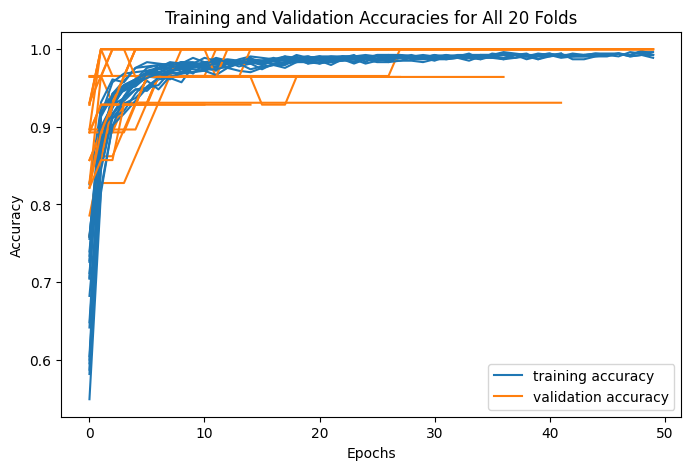

In [84]:
plot_accuracies(histories)

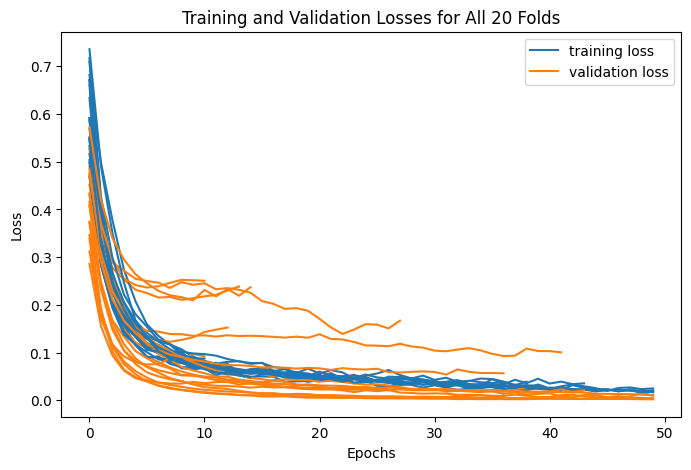

In [83]:
plot_losses(histories)

In [116]:
fold_no = 1
no_hidden_histories = []
no_hidden_accuracies = []
no_hidden_losses = []

In [117]:
for train, test in k_fold.split(X_scaled, y):
    model = create_model("no_hiddens")
    print("====================================")
    print(f"Training for fold {fold_no}")
    
    history = model.fit(X_scaled[train], y.iloc[train], 
                        epochs=50, batch_size=16, 
                        callbacks=[early_stopping],
                        validation_data=(X_scaled[test], y.iloc[test]),
                        verbose=1)
    no_hidden_histories.append(history)
    
    loss, accuracy = model.evaluate(X_scaled[test], y.iloc[test])
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Loss: {loss:.4f}")

    no_hidden_accuracies.append(accuracy)
    no_hidden_losses.append(loss)

    fold_no += 1

Training for fold 1
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7191 - loss: 0.5525 - val_accuracy: 0.9310 - val_loss: 0.3739
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7572 - loss: 0.5128 - val_accuracy: 0.9655 - val_loss: 0.3102
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8489 - loss: 0.4047 - val_accuracy: 0.9655 - val_loss: 0.2667
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3450 - val_accuracy: 0.9655 - val_loss: 0.2336
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3212 - val_accuracy: 0.9655 - val_loss: 0.2060
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9186 - loss: 0.2584 - val_accuracy: 0.9655 - val_loss: 0.1858
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9203 - loss: 0.2691 - val_accuracy: 0.9655 - val_loss: 0.1672
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9074 - loss: 0.2521 - val_accuracy

In [118]:
print("== ACCURACIES WHEN OMITTING HIDDEN LAYERS ==")
print(no_hidden_accuracies)

== ACCURACIES WHEN OMITTING HIDDEN LAYERS ==
[1.0, 1.0, 0.8965517282485962, 1.0, 0.9655172228813171, 0.9655172228813171, 1.0, 0.8965517282485962, 1.0, 0.9642857313156128, 0.9642857313156128, 0.9642857313156128, 1.0, 0.9642857313156128, 0.9642857313156128, 1.0, 0.9642857313156128, 0.9285714030265808, 1.0, 1.0]


In [119]:
print("== average accuracy when hidden layers omitted ==")
print(statistics.mean(no_hidden_accuracies))

== average accuracy when hidden layers omitted ==
0.9719211846590042


In [120]:
print("== LOSSES WHEN OMITTING HIDDEN LAYERS ==")
print(no_hidden_losses)

== LOSSES WHEN OMITTING HIDDEN LAYERS ==
[0.03527934476733208, 0.07068489491939545, 0.14618752896785736, 0.06282921135425568, 0.08436837792396545, 0.1273772418498993, 0.03821773827075958, 0.18960890173912048, 0.047842346131801605, 0.09043127298355103, 0.11056386679410934, 0.09628617763519287, 0.07923576980829239, 0.08349745720624924, 0.07572939246892929, 0.08832152187824249, 0.1249120682477951, 0.28610801696777344, 0.08637725561857224, 0.031915370374917984]


In [121]:
print("== average loss when hidden layers omitted ==")
print(statistics.mean(no_hidden_losses))

== average loss when hidden layers omitted ==
0.09778868779540062


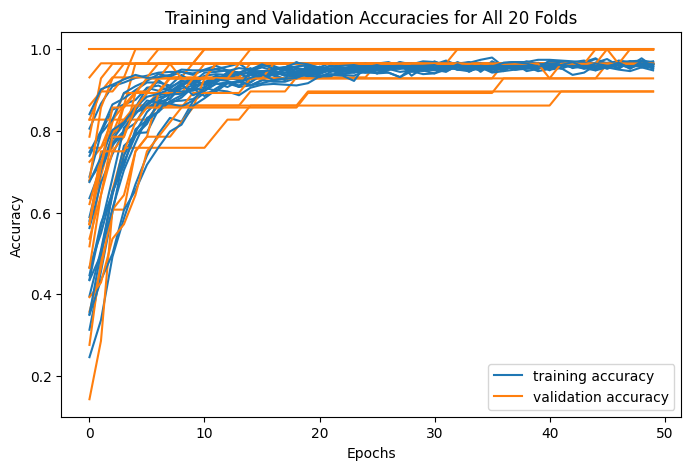

In [122]:
plot_accuracies(no_hidden_histories)

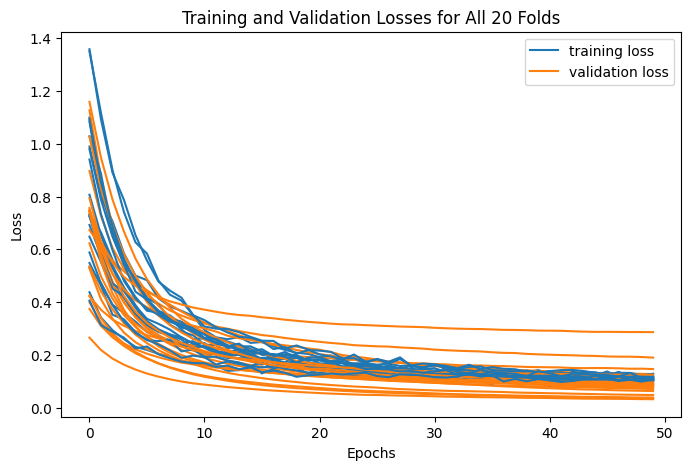

In [123]:
plot_losses(no_hidden_histories)

In [109]:
fold_no = 1
no_norm_histories = []
no_norm_accuracies = []
no_norm_losses = []

In [110]:
# no z-scale standardization
for train, test in k_fold.split(X, y):
    model = create_model("regular")
    print("====================================")
    print(f"Training for fold {fold_no}")
    
    no_norm_history = model.fit(X.iloc[train], y.iloc[train], 
                        epochs=50, batch_size=16, 
                        callbacks=[early_stopping],
                        validation_data=(X.iloc[test], y.iloc[test]),
                        verbose=1)
    no_norm_histories.append(no_norm_history)
    
    loss, accuracy = model.evaluate(X.iloc[test], y.iloc[test])
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Loss: {loss:.4f}")

    no_norm_accuracies.append(accuracy)
    no_norm_losses.append(loss)

    fold_no += 1

Training for fold 1
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6215 - loss: 73.3264 - val_accuracy: 0.3448 - val_loss: 4.7922
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - loss: 15.1930 - val_accuracy: 0.7931 - val_loss: 0.4520
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 7.4620 - val_accuracy: 1.0000 - val_loss: 0.0627
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7134 - loss: 3.8227 - val_accuracy: 0.9655 - val_loss: 0.0781
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 3.1041 - val_accuracy: 0.9655 - val_loss: 0.1063
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7312 - loss: 1.7892 - val_accuracy: 0.9310 - val_loss: 0.1165
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 1.3800 - val_accuracy: 0.8966 - val_loss: 0.1655
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8187 - loss: 0.7779 - val_accura

In [111]:
print("== ACCURACIES WHEN OMITTING Z-SCALE NORMALIZATION ==")
print(no_norm_accuracies)

== ACCURACIES WHEN OMITTING Z-SCALE NORMALIZATION ==
[1.0, 0.9655172228813171, 0.8620689511299133, 0.8620689511299133, 0.8275862336158752, 0.8965517282485962, 1.0, 0.931034505367279, 0.7931034564971924, 0.9285714030265808, 0.9642857313156128, 0.9285714030265808, 0.9285714030265808, 0.9642857313156128, 0.9285714030265808, 0.9642857313156128, 0.8928571343421936, 0.8928571343421936, 0.9642857313156128, 0.8928571343421936]


In [112]:
print("== average accuracy when z-scale norm omitted ==")
print(statistics.mean(no_norm_accuracies))

== average accuracy when z-scale norm omitted ==
0.9193965494632721


In [125]:
print("== LOSSES WHEN OMITTING Z-SCALE NORMALIZATION ==")
print(no_norm_losses)

== LOSSES WHEN OMITTING Z-SCALE NORMALIZATION ==
[0.06270380318164825, 0.06378275901079178, 0.32881399989128113, 0.31013554334640503, 0.6771750450134277, 0.18867215514183044, 0.0016945229144766927, 0.18403437733650208, 0.35590383410453796, 0.23205025494098663, 0.10390101373195648, 0.2918587625026703, 0.24830010533332825, 0.12311990559101105, 0.19577255845069885, 0.18944473564624786, 0.18065594136714935, 0.25325244665145874, 0.12245925515890121, 0.24079357087612152]


In [113]:
print("== average loss when z-scale norm omitted ==")
print(statistics.mean(no_norm_losses))

== average loss when z-scale norm omitted ==
0.21772622950957157


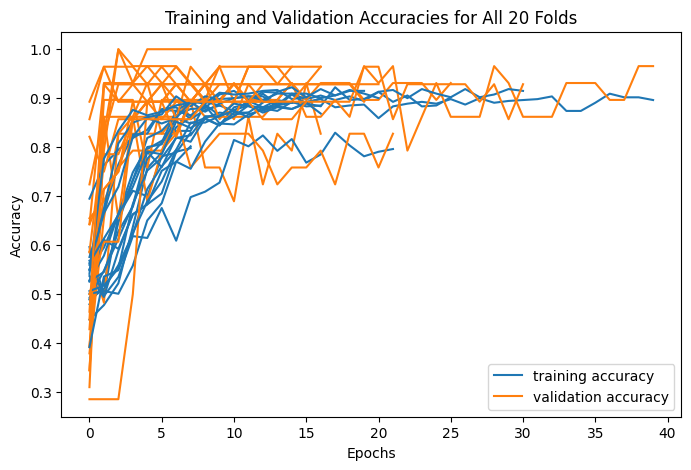

In [114]:
plot_accuracies(no_norm_histories)

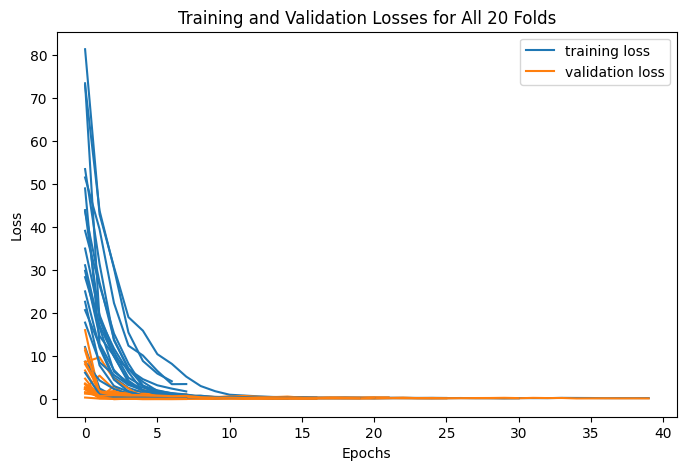

In [115]:
plot_losses(no_norm_histories)

In [129]:
fold_no = 1
no_drop_hists = []
no_drop_accuracies = []
no_drop_losses = []

In [130]:
for train, test in k_fold.split(X_scaled, y):
    model = create_model("no_dropout")
    print("====================================")
    print(f"Training for fold {fold_no}")
    
    no_drop_history = model.fit(X_scaled[train], y.iloc[train], 
                        epochs=50, batch_size=16, 
                        callbacks=[early_stopping],
                        validation_data=(X_scaled[test], y.iloc[test]),
                        verbose=1)
    no_drop_hists.append(no_drop_history)
    
    loss, accuracy = model.evaluate(X_scaled[test], y.iloc[test])
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Loss: {loss:.4f}")

    no_drop_accuracies.append(accuracy)
    no_drop_losses.append(loss)

    fold_no += 1

Training for fold 1
Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8981 - loss: 0.4491 - val_accuracy: 0.9310 - val_loss: 0.2186
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9540 - loss: 0.2181 - val_accuracy: 0.9655 - val_loss: 0.1169
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9467 - loss: 0.1619 - val_accuracy: 1.0000 - val_loss: 0.0753
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9492 - loss: 0.1401 - val_accuracy: 1.0000 - val_loss: 0.0550
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9587 - loss: 0.0947 - val_accuracy: 1.0000 - val_loss: 0.0432
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0670 - val_accuracy: 1.0000 - val_loss: 0.0320
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0685 - val_accuracy: 1.0000 - val_loss: 0.0260
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.0773 - val_accuracy

In [131]:
print("== ACCURACIES WHEN OMITTING DROPOUT ==")
print(no_drop_accuracies)

== ACCURACIES WHEN OMITTING DROPOUT ==
[1.0, 1.0, 1.0, 1.0, 1.0, 0.9655172228813171, 0.931034505367279, 1.0, 0.931034505367279, 1.0, 1.0, 1.0, 0.9642857313156128, 1.0, 1.0, 0.9642857313156128, 1.0, 0.9642857313156128, 1.0, 1.0]


In [132]:
print("== average accuracy when dropout omitted ==")
print(statistics.mean(no_drop_accuracies))

== average accuracy when dropout omitted ==
0.9860221713781356


In [133]:
print("== average loss when dropout omitted ==")
print(statistics.mean(no_drop_losses))

== average loss when dropout omitted ==
0.05040658794168849


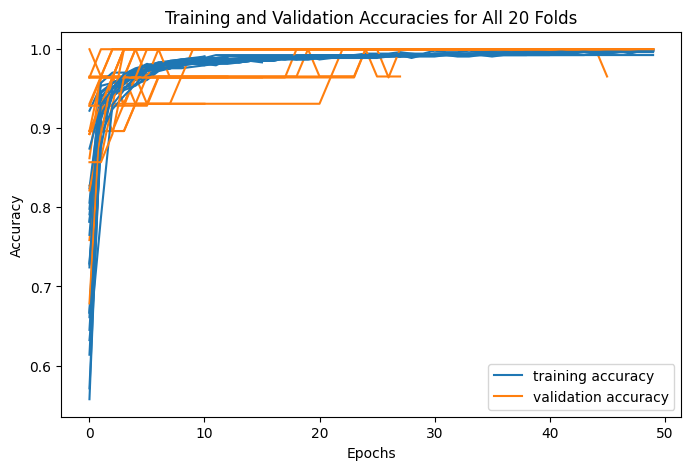

In [135]:
plot_accuracies(no_drop_hists)

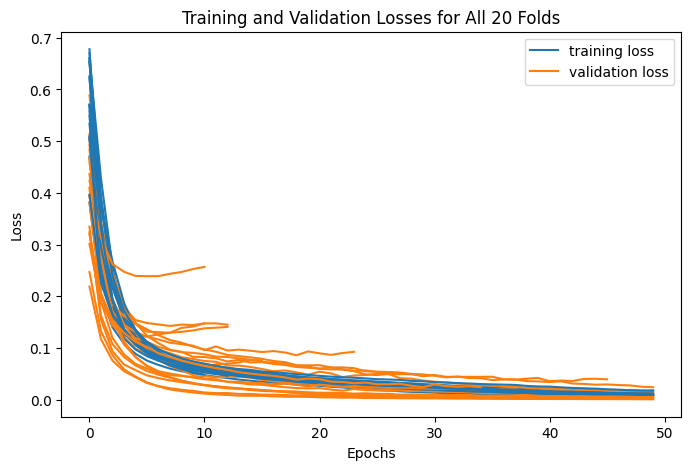

In [136]:
plot_losses(no_drop_hists)